# Import Necesarry Libraries and Files

In [1]:
# Libraries
import pymssql
import nbformat
import pandas as pd
import matplotlib.pyplot as plt

# Files
%run ./SQL_Server_settings.ipynb

# Connecting Python with SQL Server

In [2]:
# Creating connection
conn = pymssql.connect(
    server = server,
    user = user,
    password = password,
    database = "Console_And_Gaming",
    as_dict=True
)
# Creating cursor
cursor = conn.cursor()

# Creating Data to Visualization

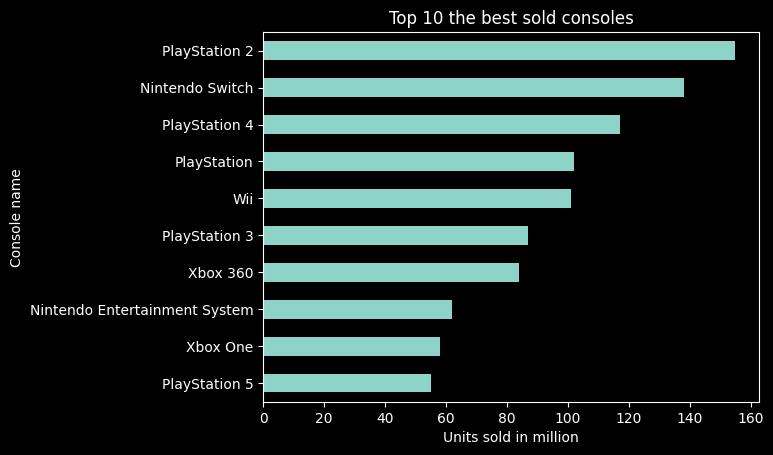

In [3]:
# SQL query - top 10 Consoles
top_10_Consoles = '''
SELECT TOP 10 Console_Name,
    Units_sold_in_million
FROM Console
ORDER BY Units_sold_in_million DESC
'''
cursor.execute(top_10_Consoles)
records = cursor.fetchall()

# Creating dataframe in Pandas
df = pd.DataFrame(records)

# Changing values type in Units_sold_in_million column
df["Units_sold_in_million"] = df["Units_sold_in_million"].astype(int)

# Creating bar chart
plt.style.use('dark_background')
df.sort_values("Units_sold_in_million", ascending = True).plot.barh(x = "Console_Name", y = 'Units_sold_in_million')
plt.title("Top 10 the best sold consoles")
plt.xlabel("Units sold in million")
plt.ylabel("Console name")
plt.legend().remove()

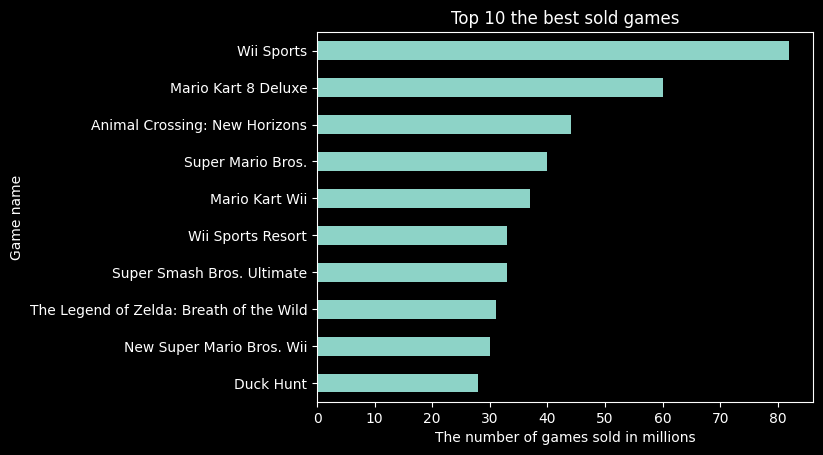

In [8]:
# Creating Top 10 Games
top_10_Games = '''
SELECT TOP 10 Game_Name,
    Units_m
FROM Games
ORDER BY Units_m DESC
'''
cursor.execute(top_10_Games)
records_games = cursor.fetchall()

# Creating dataframe in Pandas
df_games = pd.DataFrame(records_games)

# Changing values type in Units_m column
df_games["Units_m"] = df_games["Units_m"].astype(int)

# Creating bar chart
plt.style.use('dark_background')
df_games.sort_values("Units_m", ascending = True).plot.barh(x = "Game_Name", y = "Units_m")
plt.xlabel("The number of games sold in millions")
plt.ylabel("Game name")
plt.title("Top 10 the best sold games")
plt.legend().remove()